## Calculate estimate of gini coefficient for each municipality

In [1]:
import pandas as pd

df = pd.read_pickle('d2.pkl')

In [63]:
df.columns[39:51]

Index(['p_less10', 'p_10to15', 'p_15to25', 'p_25to35', 'p_35to50', 'p_50to75',
       'p_75to100', 'p_100to150', 'p_150to200', 'p_over200', 'hh_inc_med',
       'hh_inc_mean'],
      dtype='object')

In [38]:
df_gini = pd.concat([df.iloc[:,:5], df.iloc[:,39:50]],axis=1)
#result = pd.concat([df1, df4], axis=1, join='inner')

In [39]:
df_gini.describe()

,p_less10,p_10to15,p_15to25,p_25to35,p_35to50,p_50to75,p_75to100,p_100to150,p_150to200,p_over200,hh_inc_med
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,4.037876,3.124071,7.338938,7.146549,10.048496,16.099469,13.256991,18.070088,9.293982,11.585487,83768.166372
std,3.233197,2.318677,4.547789,3.448837,3.928034,4.613615,3.771389,5.449296,4.581809,11.526807,30141.993205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.600000,4.600000,4.600000,7.200000,13.200000,10.700000,14.900000,5.700000,3.800000,63017.000000
50%,3.200000,2.600000,6.600000,6.800000,9.900000,16.200000,13.200000,18.500000,9.200000,8.000000,78132.000000
75%,5.300000,4.000000,9.400000,9.200000,12.700000,19.300000,15.700000,21.500000,12.400000,16.500000,102168.000000
max,24.100000,15.200000,71.400000,28.600000,25.700000,32.200000,27.600000,45.700000,23.600000,100.000000,194536.000000


### Share of income per bin

With binned data, estimate income at center of bin   
Except top bin of Over 200K estimate at 1.5*200K = 300K   
   
income_share = bin_midpoint * %_share_of_households

In [40]:
df_gini['incshare_less10'] = df_gini['p_less10'] * 5000 * 0.01
df_gini['incshare_10to15'] = df_gini['p_10to15'] * 12500 * 0.01
df_gini['incshare_15to25'] = df_gini['p_15to25'] * 20000 * 0.01
df_gini['incshare_25to35'] = df_gini['p_25to35'] * 30000 * 0.01
df_gini['incshare_35to50'] = df_gini['p_35to50'] * 42500 * 0.01
df_gini['incshare_50to75'] = df_gini['p_50to75'] * 62500 * 0.01
df_gini['incshare_75to100'] = df_gini['p_75to100'] * 87500 * 0.01
df_gini['incshare_100to150'] = df_gini['p_100to150'] * 125000 * 0.01
df_gini['incshare_150to200'] = df_gini['p_150to200'] * 175000 * 0.01
df_gini['incshare_over200'] = df_gini['p_over200'] * 300000 * 0.01


In [41]:
## Cumulative share of population
df_gini['cumpop_less10'] = df_gini['p_less10'] 
df_gini['cumpop_10to15'] = df_gini['p_10to15'] + df_gini['cumpop_less10']
df_gini['cumpop_15to25'] = df_gini['p_15to25'] + df_gini['cumpop_10to15']
df_gini['cumpop_25to35'] = df_gini['p_25to35'] + df_gini['cumpop_15to25'] 
df_gini['cumpop_35to50'] = df_gini['p_35to50'] + df_gini['cumpop_25to35'] 
df_gini['cumpop_50to75'] = df_gini['p_50to75'] + df_gini['cumpop_35to50']
df_gini['cumpop_75to100'] = df_gini['p_75to100'] + df_gini['cumpop_50to75']
df_gini['cumpop_100to150'] = df_gini['p_100to150'] + df_gini['cumpop_75to100']
df_gini['cumpop_150to200'] = df_gini['p_150to200'] + df_gini['cumpop_100to150'] 
df_gini['cumpop_over200'] = df_gini['p_over200'] + df_gini['cumpop_150to200'] 


In [42]:
df_gini['cuminc_less10'] = df_gini['incshare_less10'] 
df_gini['cuminc_10to15'] = df_gini['incshare_10to15'] + df_gini['cuminc_less10']
df_gini['cuminc_15to25'] = df_gini['incshare_15to25'] + df_gini['cuminc_10to15']
df_gini['cuminc_25to35'] = df_gini['incshare_25to35'] + df_gini['cuminc_15to25'] 
df_gini['cuminc_35to50'] = df_gini['incshare_35to50'] + df_gini['cuminc_25to35'] 
df_gini['cuminc_50to75'] = df_gini['incshare_50to75'] + df_gini['cuminc_35to50']
df_gini['cuminc_75to100'] = df_gini['incshare_75to100'] + df_gini['cuminc_50to75']
df_gini['cuminc_100to150'] = df_gini['incshare_100to150'] + df_gini['cuminc_75to100']
df_gini['cuminc_150to200'] = df_gini['incshare_150to200'] + df_gini['cuminc_100to150'] 
df_gini['cuminc_over200'] = df_gini['incshare_over200'] + df_gini['cuminc_150to200'] 


In [43]:
df_gini['tot_inc'] = df_gini['cuminc_over200']

In [44]:
df_gini['p_cuminc_less10'] = df_gini['cuminc_less10'] / df_gini['tot_inc']
df_gini['p_cuminc_10to15'] = df_gini['cuminc_10to15']  / df_gini['tot_inc']
df_gini['p_cuminc_15to25'] = df_gini['cuminc_15to25']  / df_gini['tot_inc']
df_gini['p_cuminc_25to35'] = df_gini['cuminc_25to35']   / df_gini['tot_inc']
df_gini['p_cuminc_35to50'] = df_gini['cuminc_35to50']   / df_gini['tot_inc']
df_gini['p_cuminc_50to75'] = df_gini['cuminc_50to75']  / df_gini['tot_inc']
df_gini['p_cuminc_75to100'] = df_gini['cuminc_75to100']  / df_gini['tot_inc']
df_gini['p_cuminc_100to150'] = df_gini['cuminc_100to150']  / df_gini['tot_inc']
df_gini['p_cuminc_150to200'] = df_gini['cuminc_150to200']   / df_gini['tot_inc']
df_gini['p_cuminc_over200'] = df_gini['cuminc_over200']   / df_gini['tot_inc']


In [45]:
df_gini.head()

,town,county,state,FIPS,city_town,p_less10,p_10to15,p_15to25,p_25to35,p_35to50,...,p_cuminc_less10,p_cuminc_10to15,p_cuminc_15to25,p_cuminc_25to35,p_cuminc_35to50,p_cuminc_50to75,p_cuminc_75to100,p_cuminc_100to150,p_cuminc_150to200,p_cuminc_over200
0,Absecon city,Atlantic County,New Jersey,3400100100,"Absecon city, Atlantic County, New Jersey",2.0,0.9,7.4,14.0,15.5,...,0.001226,0.002605,0.020747,0.072230,0.152979,0.323057,0.475362,0.656166,0.797745,1.0
1,Atlantic City city,Atlantic County,New Jersey,3400102080,"Atlantic City city, Atlantic County, New Jersey",18.5,10.8,18.1,12.7,14.0,...,0.022146,0.054468,0.141138,0.232358,0.374813,0.555875,0.677381,0.821033,0.892261,1.0
2,Brigantine city,Atlantic County,New Jersey,3400107810,"Brigantine city, Atlantic County, New Jersey",4.7,3.9,13.5,11.0,13.3,...,0.003004,0.009235,0.043745,0.085924,0.158172,0.280396,0.407893,0.631571,0.808276,1.0
3,Buena borough,Atlantic County,New Jersey,3400108680,"Buena borough, Atlantic County, New Jersey",6.6,7.5,12.2,13.0,14.6,...,0.005038,0.019351,0.056603,0.116145,0.210878,0.320611,0.534351,0.767176,0.858015,1.0
4,Buena Vista township,Atlantic County,New Jersey,3400108710,"Buena Vista township, Atlantic County, New Jersey",4.9,8.2,7.5,9.5,15.8,...,0.003535,0.018327,0.039973,0.081100,0.178001,0.388145,0.572495,0.720408,0.813846,1.0


In [46]:
B_less10 = df_gini['p_less10'] * 0.01 * df_gini['p_cuminc_less10'] * 0.5
B_10to15 = ((df_gini['p_less10']*0.01*df_gini['p_cuminc_less10']) + (df_gini['p_10to15']*0.01*df_gini['p_cuminc_10to15'])) / 2
B_15to25 = ((df_gini['p_10to15']*0.01*df_gini['p_cuminc_10to15']) + (df_gini['p_15to25']*0.01*df_gini['p_cuminc_15to25'])) / 2
B_25to35 = ((df_gini['p_15to25']*0.01*df_gini['p_cuminc_15to25']) + (df_gini['p_25to35']*0.01*df_gini['p_cuminc_25to35'])) / 2
B_35to50 = ((df_gini['p_25to35']*0.01*df_gini['p_cuminc_25to35']) + (df_gini['p_35to50']*0.01*df_gini['p_cuminc_35to50'])) / 2
B_50to75 = ((df_gini['p_35to50']*0.01*df_gini['p_cuminc_35to50']) + (df_gini['p_50to75']*0.01*df_gini['p_cuminc_50to75'])) / 2
B_75to100 = ((df_gini['p_50to75']*0.01*df_gini['p_cuminc_50to75']) + (df_gini['p_75to100']*0.01*df_gini['p_cuminc_75to100'])) / 2
B_100to150 = ((df_gini['p_75to100']*0.01*df_gini['p_cuminc_75to100']) + (df_gini['p_100to150']*0.01*df_gini['p_cuminc_100to150'])) / 2
B_150to200 = ((df_gini['p_100to150']*0.01*df_gini['p_cuminc_100to150']) + (df_gini['p_150to200']*0.01*df_gini['p_cuminc_150to200'])) / 2
B_over200 = ((df_gini['p_150to200']*0.01*df_gini['p_cuminc_150to200']) + (df_gini['p_over200']*0.01*df_gini['p_cuminc_over200'])) / 2



In [47]:
B = B_less10 + B_10to15 + B_15to25 + B_25to35 + B_35to50 + B_50to75 + B_75to100 + B_100to150 + B_150to200 + B_over200


In [48]:
df_gini['gini'] = 1 - (2*B)

In [49]:
df_gini['gini'].describe()

count    565.000000
mean       0.346654
std        0.081611
min       -0.464031
25%        0.298138
50%        0.346907
75%        0.405243
max        0.506263
Name: gini, dtype: float64

In [50]:
df_gini.sort_values('gini')

,town,county,state,FIPS,city_town,p_less10,p_10to15,p_15to25,p_25to35,p_35to50,...,p_cuminc_10to15,p_cuminc_15to25,p_cuminc_25to35,p_cuminc_35to50,p_cuminc_50to75,p_cuminc_75to100,p_cuminc_100to150,p_cuminc_150to200,p_cuminc_over200,gini
520,Walpack township,Sussex County,New Jersey,3403776640,"Walpack township, Sussex County, New Jersey",0.0,0.0,71.4,28.6,0.0,...,0.000000,0.624672,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,-0.464031
161,Pine Valley borough,Camden County,New Jersey,3400758920,"Pine Valley borough, Camden County, New Jersey",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
165,Tavistock borough,Camden County,New Jersey,3400772240,"Tavistock borough, Camden County, New Jersey",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
273,Kingwood township,Hunterdon County,New Jersey,3401937065,"Kingwood township, Hunterdon County, New Jersey",0.0,0.8,3.9,4.2,7.8,...,0.000851,0.007489,0.018212,0.046424,0.097485,0.183865,0.670014,0.790647,1.0,0.106779
475,Upper Pittsgrove township,Salem County,New Jersey,3403375110,"Upper Pittsgrove township, Salem County, New J...",0.0,0.7,3.7,4.8,9.0,...,0.000919,0.008694,0.023823,0.064010,0.220950,0.426875,0.707922,0.921202,1.0,0.146971
196,Shiloh borough,Cumberland County,New Jersey,3401167020,"Shiloh borough, Cumberland County, New Jersey",7.8,0.0,1.4,11.5,9.7,...,0.004860,0.008350,0.051344,0.102720,0.225005,0.500888,0.866966,0.947659,1.0,0.151569
8,Estell Manor city,Atlantic County,New Jersey,3400121870,"Estell Manor city, Atlantic County, New Jersey",1.0,1.4,6.4,6.9,4.4,...,0.002451,0.016397,0.038951,0.059325,0.210498,0.415466,0.760031,0.918285,1.0,0.153104
462,Alloway township,Salem County,New Jersey,3403300880,"Alloway township, Salem County, New Jersey",4.3,3.1,3.5,6.7,12.8,...,0.007177,0.015515,0.039457,0.104255,0.297073,0.356481,0.785295,0.949972,1.0,0.155324
128,Washington township,Burlington County,New Jersey,3400577150,"Washington township, Burlington County, New Je...",1.1,0.0,3.2,8.8,14.4,...,0.000607,0.007676,0.036834,0.104426,0.243173,0.399729,0.725543,0.930419,1.0,0.174965
464,Elmer borough,Salem County,New Jersey,3403321240,"Elmer borough, Salem County, New Jersey",4.2,2.2,8.6,10.4,9.6,...,0.006481,0.029467,0.071161,0.125685,0.296071,0.480823,0.888414,0.967927,1.0,0.175376


In [51]:
df_gini.iloc[520,35]

100.0

In [57]:
## Walpack township as usual is a major outlier due to having only a population of 16
##  therefore set its gini coefficient to 0

#df_gini.info()
df_gini.iloc[520,57] = 0
df_gini.iloc[520,4]


'Walpack township, Sussex County, New Jersey'

In [58]:
df_to_d3 = df_gini.loc[:,'FIPS':'city_town'] 
df_to_d3['cluster'] = df_gini[['gini']]
df_to_d3.columns = ['id','name','cluster']
#cluster_labels]])
df_to_d3.head()
df_to_d3.to_csv('gini_coeff.tsv',sep = '\t', index = False)

In [59]:
df_to_d3.describe()

,cluster
count,565.000000
mean,0.347475
std,0.075548
min,0.000000
25%,0.298138
50%,0.346907
75%,0.405243
max,0.506263


In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

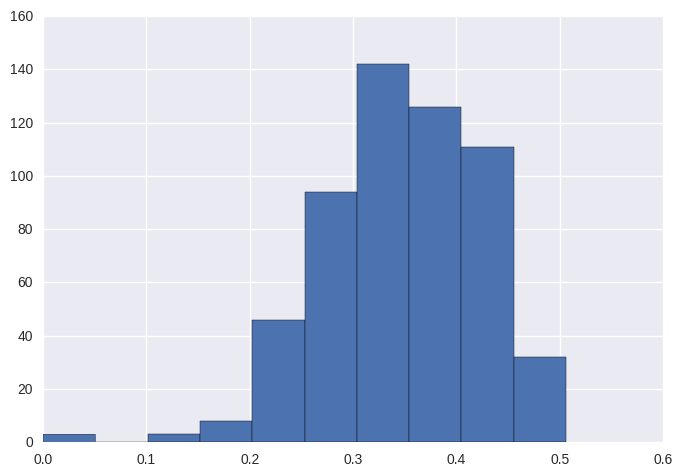

In [62]:
plt.hist(df_gini['gini']);